### 1. 드라이브에 제시된 Heart Attack_train, Heart Attack_test 파일을 이용하여 다음 문제를  해결하세요. 

- 1) 주어진 데이터를 이용하여 heart attack 가능성을 예측하는 모델을 만들 것입니다. target을 예측하는 최적의 모델을 만드세요. 

- 2) 1)에서 만든 모델을 이용하여 target과 각각의 변수간의 관계를 설명하세요. 

- 3) 1)에서 만든 모델의 test misclassification rate를 구하세요.


In [61]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

ha_train = pd.read_csv('/content/drive/Shareddrives/TNT/스터디/2021년 겨울방학/과제/3주차 과제/heart attack test.csv', index_col = 0 )
ha_test = pd.read_csv('/content/drive/Shareddrives/TNT/스터디/2021년 겨울방학/과제/3주차 과제/heart attack train.csv', index_col = 0)
ha_train.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
288,57,1,0,110,335,0,1,143,1,3.0,1,1,3,0
259,38,1,3,120,231,0,1,182,1,3.8,1,0,3,0
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1,0
110,64,0,0,180,325,0,1,154,1,0.0,2,0,2,1


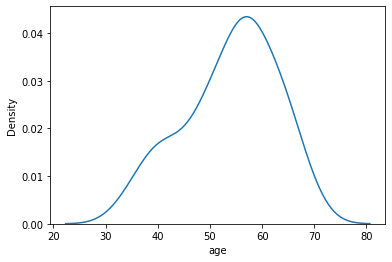

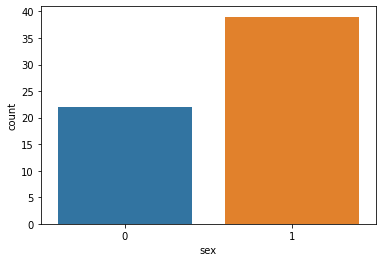

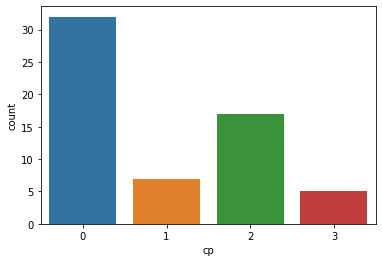

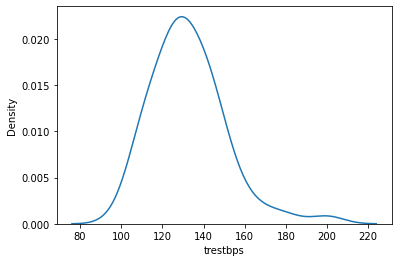

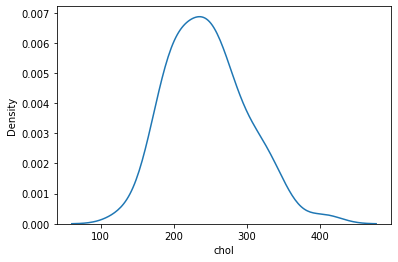

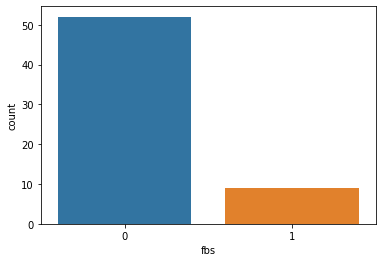

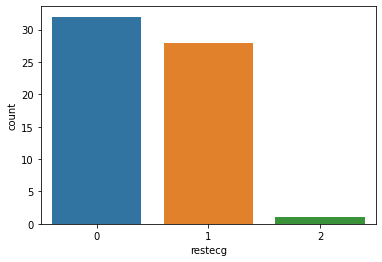

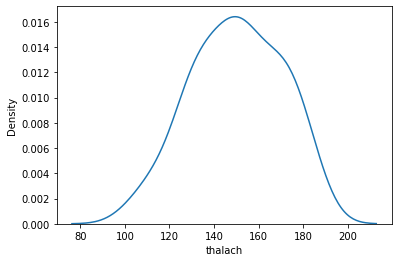

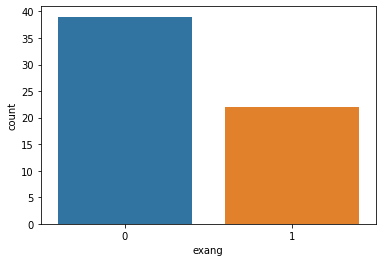

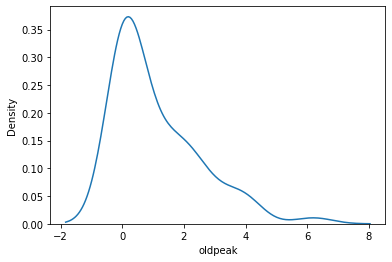

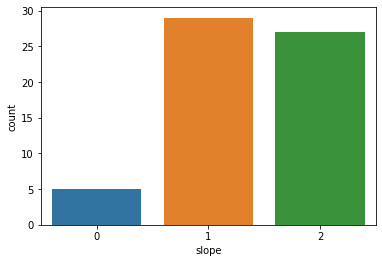

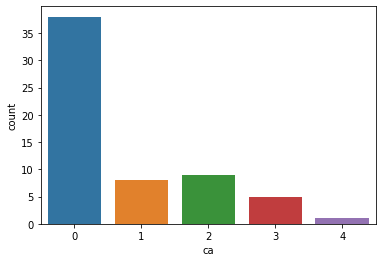

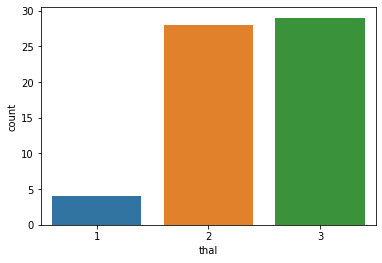

In [62]:
ha_train.isnull().sum()

#cat values 
cat = ['sex', 'cp', 'fbs', 'restecg','exang', 'slope','ca','thal'] 
train_col= ha_train.columns[:-1]
for col in train_col :

  if col not in cat: 
    sns.kdeplot(ha_train[col])
  else:
    # print(ha_train[col].value_counts())
    sns.countplot(ha_train[col])
  
  
  plt.show()



In [63]:
# from sklearn.preprocessing import StandardScaler


# for col in train_col:
#   if col not in cat:
#     scaler = StandardScaler()
#     ha_train[col] = scaler.fit_transform(ha_train[[col]])
#     ha_test[col] = scaler.transform(ha_test[[col]])

In [64]:
import statsmodels.api as sm
#1 
logis = sm.Logit(ha_train['target'], ha_train[train_col]).fit()


#2 
logis.summary()
logis.params
print(np.exp(logis.params))


#3
from sklearn.metrics import confusion_matrix
pred = logis.predict(ha_test.iloc[:,:-1])
pred


def cut_off(y, threshold) :
    Y = y.copy() 
    Y[Y>threshold] = 1
    Y[Y<threshold] = 0
    return Y.astype(int)
    
pred_y = cut_off(pred, 0.5)
pred_y

print(confusion_matrix(ha_test['target'],pred_y))

#3 
from sklearn.metrics import accuracy_score
1- accuracy_score(ha_test['target'], pred_y)  #0.190 (scale worse )


Optimization terminated successfully.
         Current function value: 0.308736
         Iterations 8
age          1.076288
sex          1.420842
cp           3.110058
trestbps     0.993017
chol         0.988158
fbs          0.760322
restecg      1.115710
thalach      1.019671
exang        0.904684
oldpeak      0.631168
slope       10.596315
ca           0.289889
thal         0.063796
dtype: float64
[[ 83  25]
 [ 21 113]]


0.1900826446280992

### 2. 드라이브에 제시된 Satisfaction_train, Satisfaction_test 파일을 이용하여 다음 문제를 해결하세요. 


- 1) 주어진 데이터를 이용하여 satisfaction을 예측하는 모델을 만들 것입니다. satisfaction을 예측하는 최적의  모델을 만드세요. 

- 3) 1)에서 만든 모델의 test misclassification rate를 구하세요.


In [48]:
sat_train = pd.read_csv('/content/drive/Shareddrives/TNT/스터디/2021년 겨울방학/과제/3주차 과제/satisfaction_train.csv', index_col = 0 )
sat_test=pd.read_csv('/content/drive/Shareddrives/TNT/스터디/2021년 겨울방학/과제/3주차 과제/satisfaction_test.csv', index_col = 0)
sat_train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
105527,Female,Loyal Customer,39,Business travel,Business,2725,5,5,2,5,4,4,5,4,4,4,4,4,4,4,73,65.0,satisfied
82617,Female,Loyal Customer,27,Business travel,Business,1634,3,3,3,3,3,3,3,3,3,4,4,2,3,3,39,37.0,dissatisfied
34069,Female,Loyal Customer,21,Personal Travel,Eco Plus,1341,4,4,0,1,1,0,1,1,4,1,3,5,4,1,0,0.0,satisfied
18636,Male,Loyal Customer,64,Personal Travel,Eco Plus,3794,2,5,2,4,2,1,1,5,3,3,5,1,4,1,570,567.0,dissatisfied
28693,Female,Loyal Customer,69,Personal Travel,Eco,1237,5,5,5,5,4,5,5,5,5,5,5,3,5,4,69,72.0,satisfied


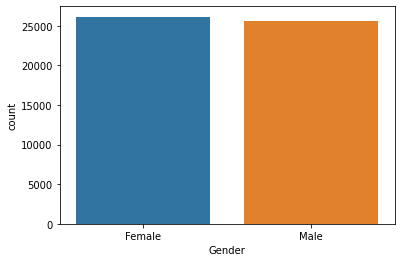

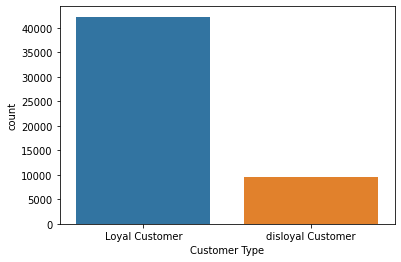

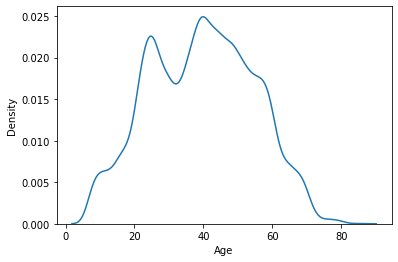

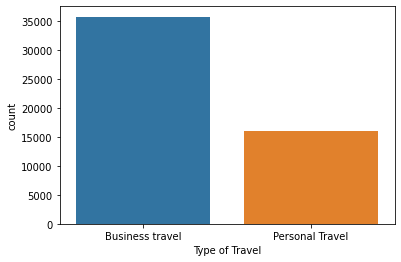

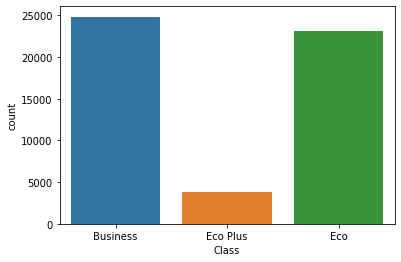

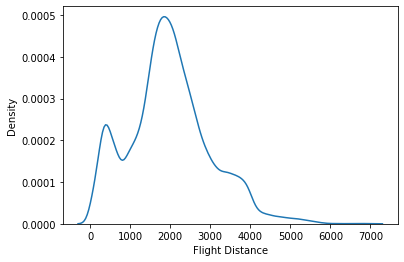

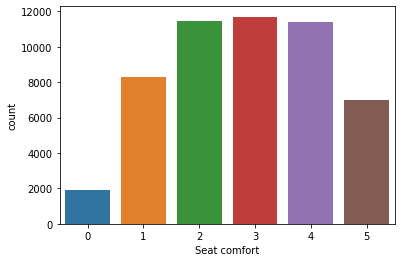

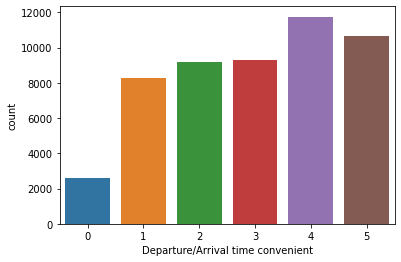

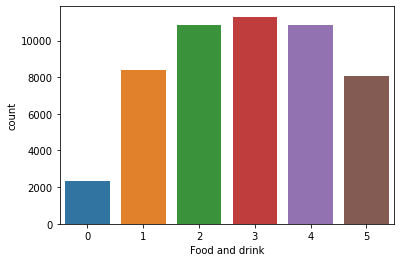

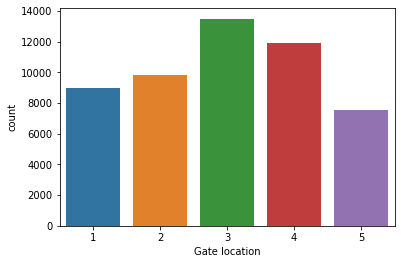

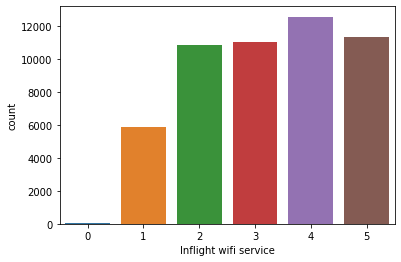

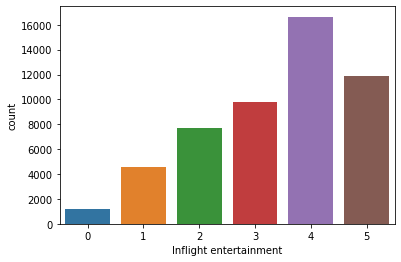

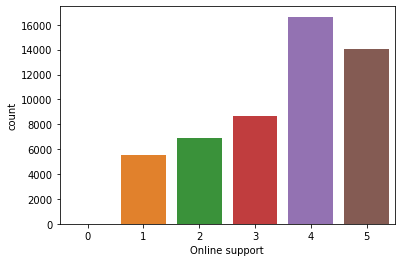

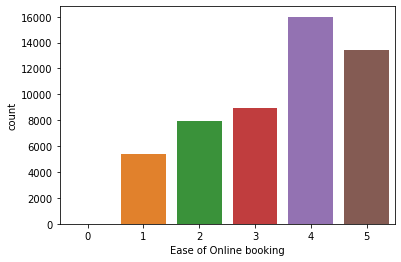

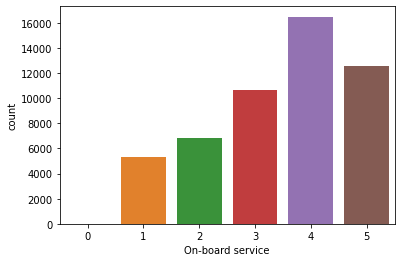

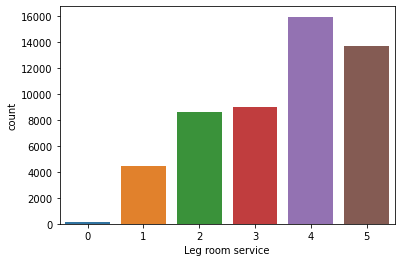

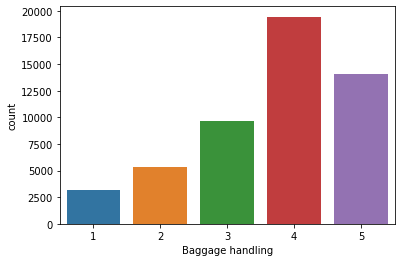

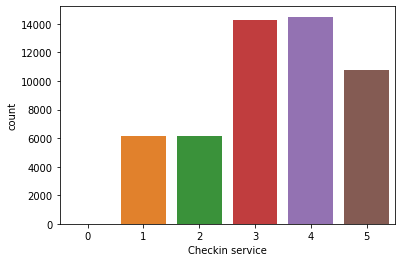

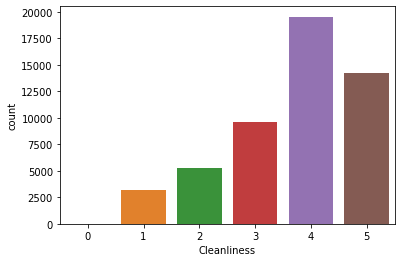

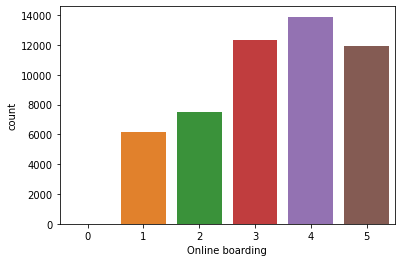

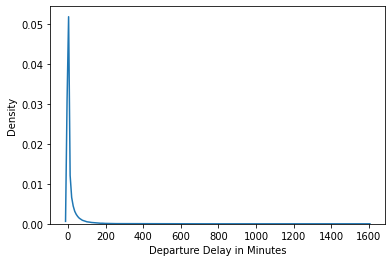

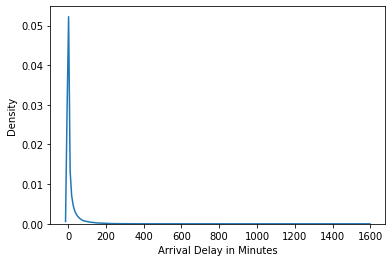

In [66]:
sat_train.isnull().sum()

#cat values 
num = ['Age', 'Flight Distance', 'Departure Delay in Minutes' , 'Arrival Delay in Minutes'] 
train_col= sat_train.columns[:-1]
for col in train_col :

  if col in num: 
    sns.kdeplot(sat_train[col])
  else:
    # print(ha_train[col].value_counts())
    sns.countplot(sat_train[col])
  
  
  plt.show()



In [77]:

from sklearn.preprocessing import LabelEncoder

cat = ['Gender'	,'Customer Type',	'Type of Travel',	'Class' , 'satisfaction']
for c in cat:
  encoder = LabelEncoder()
  sat_train[c] = encoder.fit_transform(sat_train[[c]])
  sat_test[c] = encoder.fit_transform(sat_test[[c]])
sat_test.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
25158,1,0,53,1,1,2342,3,4,3,2,3,3,3,3,4,4,4,3,4,3,51,81.0,0
116365,1,0,44,0,0,2648,4,4,4,4,2,1,3,5,5,5,5,4,5,2,2,60.0,1
55540,1,1,33,0,0,1994,3,3,3,5,4,3,4,4,3,4,5,5,5,4,0,0.0,0
58339,0,1,43,0,1,1613,4,3,5,3,1,5,1,1,3,5,3,3,4,1,12,20.0,0
109669,0,0,53,0,0,2075,1,1,1,1,3,3,4,5,5,4,5,4,5,3,8,13.0,1


In [82]:
import statsmodels.api as sm

#1 
logis = sm.Logit(sat_train['satisfaction'], sat_train[train_col]).fit()
logis.summary()
logis.params
print(np.exp(logis.params))


#3
from sklearn.metrics import confusion_matrix
pred = logis.predict(sat_test.iloc[:,:-1])



def cut_off(y, threshold) :
    Y = y.copy() 
    Y[Y>threshold] = 1
    Y[Y<threshold] = 0
    return Y.astype(int)
    
pred_y = cut_off(pred, 0.5)
pred_y


#3 
from sklearn.metrics import accuracy_score
1- accuracy_score(sat_test['satisfaction'], pred_y)  #0.190 (scale worse )


Optimization terminated successfully.
         Current function value: 0.415632
         Iterations 7
Gender                               0.345279
Customer Type                        0.096390
Age                                  0.970507
Type of Travel                       0.405150
Class                                0.419066
Flight Distance                      0.999621
Seat comfort                         1.348482
Departure/Arrival time convenient    0.818660
Food and drink                       0.787570
Gate location                        0.970675
Inflight wifi service                0.805859
Inflight entertainment               1.755761
Online support                       1.001762
Ease of Online booking               1.439379
On-board service                     1.230664
Leg room service                     1.138454
Baggage handling                     0.999980
Checkin service                      1.249102
Cleanliness                          0.971123
Online boarding         

0.1769248590624759